In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
def sin(x):
    return 0.5 * np.sin(0.25*x)

def generate_matrices(n, l, sparsity, alpha):
    W = np.random.uniform(size=(n, n))
    # ensure sparsity level
    W = W * (np.random.uniform(size=(n, n)) >= sparsity)
    # scale by largest eigenvalue
    W = W / np.max(np.linalg.eigvalsh(W))
    # scale by dynamics factor
    W = W * alpha
    # mean center
    W = W - np.mean(W)
    W_back = np.random.uniform(size=(n, l))
    return W, W_back

(20, 1)


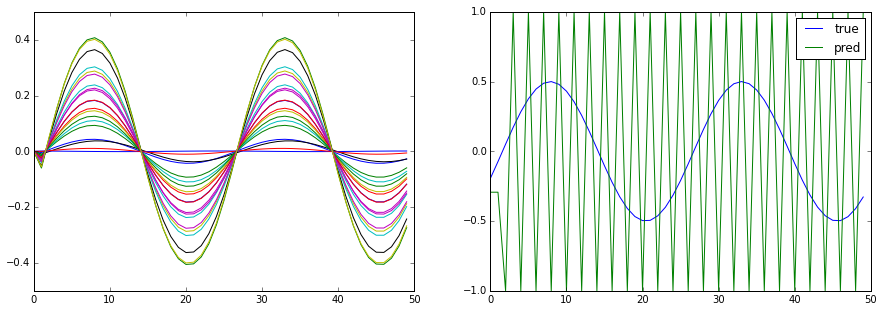

In [144]:
n = 20
l = 1
sparsity = 0.99
alpha = 0.05
washout = 100
iters = 300
test_iters = 50

W, W_back = generate_matrices(n, l, sparsity, alpha)
x = np.random.uniform(size=(n,1))
d = sin(np.arange(iters))
M = np.zeros((iters-washout, n))
T = d[washout:]

# damping plot


for i in range(1, iters):
    x = np.tanh(W.dot(x) + W_back.dot(d[i-1]))
    if i > washout:
        M[i-washout] = x.T #np.append(x, dn[i-1]).T
        
# learn output weights
W_out = np.matrix(np.linalg.pinv(M).dot(T)).T

print W_out.shape
figure(figsize=(15,5)), subplot(121)
for i in range(n):
    plot(M[:50,i])

# compute predictions for 50 more sine values
pred = np.zeros(test_iters)
for i in range(test_iters):
    d = sin(i+iters)
    y = np.tanh(W_out.T.dot(x))
    if i > 0:
        x = np.tanh(W.dot(x) + W_back.dot(pred[i-1]))
    pred[i] = y

    
subplot(122)
plot(sin(np.arange(iters, iters+test_iters)), label="true"), plot(pred, label="pred"), legend();